In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/OnlineRetail.csv", encoding='ISO-8859-1')

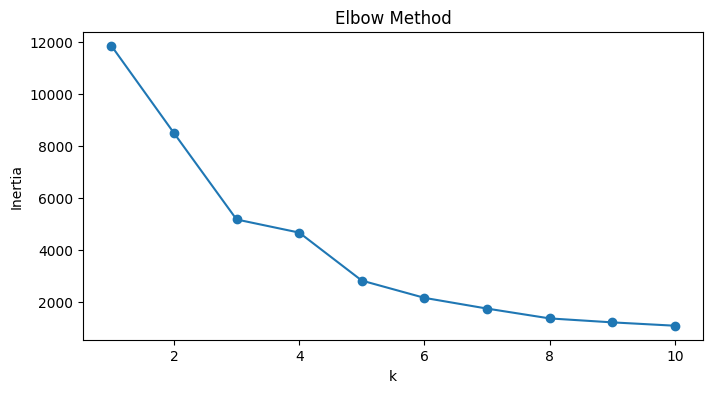

         Recency  Frequency  Monetary  CustomerCount
Cluster                                             
0         243.98       1.86    423.90           1010
1          39.73       5.62   1706.75           2919
2           1.33     173.67  27042.24              3
3           6.44      59.33  70922.33             18


In [ ]:
df = df[df['Country'] == 'United Kingdom'].copy()
df.dropna(subset=['CustomerID'], inplace=True)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'CustomerCount'}).round(2)

print(cluster_summary)

rfm.to_csv("rfm_customer_segments.csv", index=False)

In [ ]:
from google.colab import files
files.download("rfm_customer_segments.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>